**Outline**

1. Topic Review
2. Case 1 - Simulating Fake Data
3. Case 2 - Earning vs. Education
4. Case 3 - Mother's and Daughter's Height (History of Regression)

- We need to import library and function that need to run the code in this notebook to:
  - load data
  - doing simulation
  - drawing graph and other visualization

In [1]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

## **Topic Review**
---

## Simple Linear Regression Model

- Linear regression is a regression model that represent how the input variable is relate to the outcome. The input variables also called as predictors. the output also called as outcome
- Simple regression built in this equation
$y=a+bx+\epsilon$
    - y : output / outcome
    - x : input variables / predictor
    - a : intercept
    - b : slope
- a,b, and standard deviation of error $\sigma$ are parameters of the model.
- Parameter a and b are also called coefficients
- The error are assumed have normal distribution with mean 0 and standard deviation $\sigma$

- We never really know the true regression line, we just estimat the coefficient using the data we work with.

## **Case 1 - Simulating Fake Data**
---

### Create fake data

- Suppose we have create 20 fake data points from this line equation

$$y=a+bx+\epsilon$$

- Set a = 0.2, b = 0.3 and the standard deviation of error $\sigma$ = 0.5.

- Set the predictor x in range from 1 to 20



In [2]:
# Create the input variable x as a list of values from 1 to 20
x = np.arange(1, 21)

# Get the length of the list
n = len(x)

- Assume this is our true regression line
$$y=0.2+0.3x+\epsilon$$
- We can get the y using assumed true regression line

In [4]:
import numpy as np

# Define sigma
sigma = 0.5

n = 100
a = 2
b = 3
x = np.arange(n)

np.random.seed(123)

error = np.round(np.random.normal(0, sigma, n))

y = a + b * x + error


- Store the fake data in DataFrame

In [5]:
# Create a fake data frame with the x and y values
fake = pd.DataFrame({"x": x, "y": y})

- Visualize the data

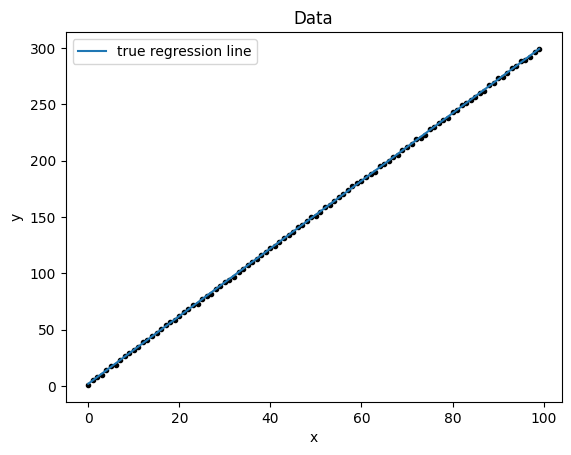

In [6]:
# Plot the data
plt.scatter(fake["x"], fake["y"], marker=".", color = "k")
plt.plot(fake["x"], a + b * fake["x"], label = "true regression line")

# Add a legend and labels
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

# Add a title
plt.title("Data")
# Show the plot
plt.show()

- Eventhough we are assuming the blue line is the true line describing the linear relationship in population, we still have the data that not lied in the line (because the error lies in real cases that vary)

### Fit linear regression to fake data

- To build regression model, we have to calculate the estimated coefficient using least square calculation

OLS estimate on a and b in regression model $y = a + bx$
$$\hat{b} = \frac{\sum_{i=1}^{n}(x_i-\bar{x})y_i}{\sum_{i=1}^{n}(x_i-\bar{x})^2}  $$


$$\hat{a} = \bar{y} - \hat{b}\bar{x}$$

#### Manual

In [7]:
demeaned_x = x - np.mean(fake["x"])

# calculating estimation of b

sum_demeaned_x_minus_y = np.sum(demeaned_x * y)
sum_demeaned_x_minus_x2 = np.sum(demeaned_x * demeaned_x)

b_hat = sum_demeaned_x_minus_y/sum_demeaned_x_minus_x2

In [8]:
# calculating estimation of a
a_hat = np.mean(fake["y"]) - (b_hat * np.mean(fake["x"]))

In [9]:
# show the results
print(f"a_hat = {np.round(a_hat,3)} \nb_hat = {np.round(b_hat,3)}")

a_hat = 2.064 
b_hat = 3.0


- construct the regression line using the estimated coefficients
$$\hat{y} = -0.258 + 0.358 x$$

#### Using Library

- Use ols function under statsmodel library as a convenience interface for specifying models using formula strings and DataFrames to calculate the estimated coefficient

In [10]:
# Import the library (use .formula so we can write the formula we want in the model)
import statsmodels.formula.api as smf

`smf.ols(formula = ...., data = ....)`
  - `formula`: The formula specifying the model.
  - `data`: The data for the model.

In [11]:
# Create OLS model object
model = smf.ols(formula = 'y ~ x', data = fake)

# or you can write like this too
# model = smf.ols('y ~ x', fake)

# Use method .fit() to fit the regression model
results = model.fit()

- “~” separates the left-hand side of the model from the right-hand side.
- The left-hand side is the outcome, while the right-hand side is the predictor

### The estimated coefficients and standard error

use `.params` to access the estimated coefficient from ols calculation

In [12]:
results.params

,0
Intercept,2.064356
x,2.999508


use `.bse` to access the standard errors of the estimated coefficients

In [13]:
results.bse

,0
Intercept,0.132740
x,0.002317


for more convenience interface we combine the results in one table  

In [14]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

In [15]:
results_coef_std = print_coef_std_err(results)

In [16]:
results_coef_std

,coef,std err
Intercept,2.064356,0.132740
x,2.999508,0.002317


- construct the line using the estimated coefficients
$$\hat{y} = -0.258 + 0.358 x$$

- the values are the same as we get in the manual calculation without library
- Visualize the data and the fitted line

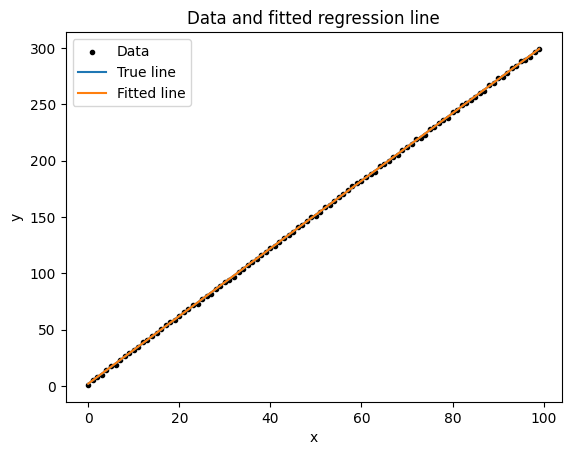

In [17]:
predictor = "x"
outcome = "y"
data = fake.copy()
results_ = results_coef_std.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

fitted_values = a_hat + b_hat * data[predictor]

# Plot the true line
plt.plot(data[predictor], a + b * data[predictor], label = "True line")

# Plot the fitted line
plt.plot(data[predictor], fitted_values, label="Fitted line")


# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

- The figure shows the model we get using OLS estimate is different from the true line we are assumed
- In real world application, we barely get the true line, but we can approximate it.

### Coefficient Interpretation

In [18]:
results_coef_std

,coef,std err
Intercept,2.064356,0.132740
x,2.999508,0.002317


- y value when x = 0 is -0.25
- the average difference in y, comparing two data point with one different in x, is 0.35

### Comparing estimates to assumed parameter values

If the model correct, we can get the interval of estimated coefficients under normal distribution assumption using standard error from the model



In [19]:
results_coef_std["upp_est_95"] = results_coef_std.loc[:,"coef"] - (2 * results_coef_std.loc[:,"std err"])
results_coef_std["low_est_95"] = results_coef_std.loc[:,"coef"] + (2 * results_coef_std.loc[:,"std err"])

In [20]:
results_coef_std["assumed_true_param"] = [a,b]
results_coef_std

,coef,std err,upp_est_95,low_est_95,assumed_true_param
Intercept,2.064356,0.132740,1.798876,2.329837,2
x,2.999508,0.002317,2.994875,3.004141,3


- 95% of the time, the intercept will lies within 0.29 to -0.8
- if the true value is 0.2, and the standard error is 0.27, it’s no surprise for the estimate to happen to be -0.25.
- 95% of the time, the estimated coefficient on x will lies within 0.31 to 0.4
- if the true value is 0.3, and the standard error is 0.02, it’s no surprise for the estimate to happen to be 0.35.

## **Case 2 - Education vs. Earning**
---

- Suppose we want to know the relationship between years of education and yearly earning based on survey data held in 1990
- The survey conducted personal data regarding average yearly earning and other variables
- Let's demostrate fitting the regression of earning on education variable

### Load Data


In [28]:
earnings = pd.read_csv("earnings.csv")
earnings.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


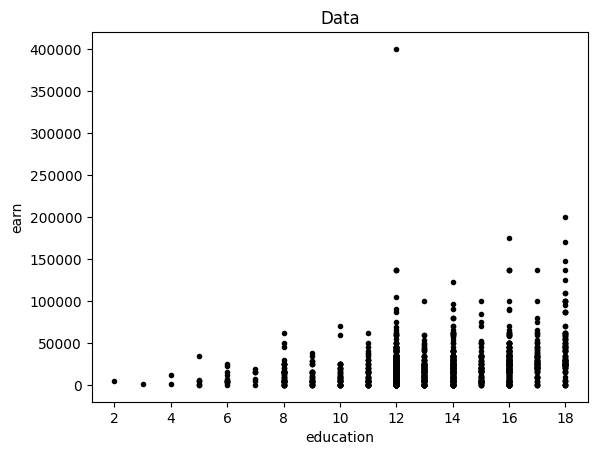

In [29]:
import matplotlib.pyplot as plt

x = earnings["education"]
y = earnings["earn"]

# Plot the data
plt.scatter(x, y, marker=".", color = "k")

# Add a legend and labels

plt.xlabel("education")
plt.ylabel("earn")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

### Fit Linear Regression

In [30]:
# Create OLS model object
model = smf.ols('earn ~ education',earnings)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_education_earn = print_coef_std_err(results)


- Visualize the data and regression line

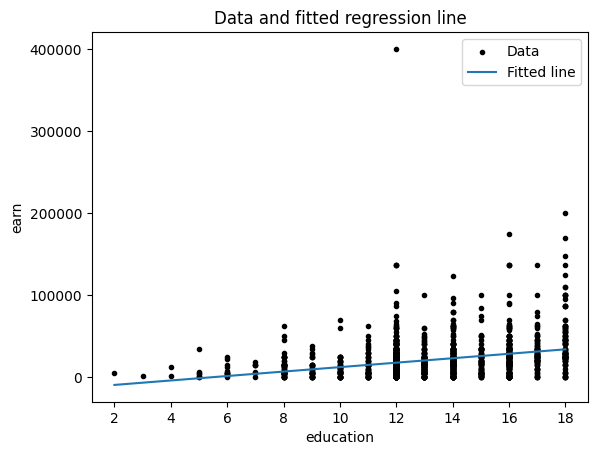

In [31]:
predictor = "education"
outcome = "earn"
data = earnings.copy()
results_ = results_education_earn.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### Coefficient Interpretation

results_education_earn
$$y = -14724 + 2709.7 x$$

- the average earning of people that has 0 years of education is `$ -14724`
- the average difference in earning between two people with one year in education, is `$2709.7`, with the people that has higher education have the higher earning

- We can write the equation equivalent to this to get easy way to interpret the intercept
$$y = 21044.04 + 2709.7 (x-13.2)$$

- the average earning of people that has average years of education is `$21044.04`
- the average difference in earning between two people with one year in education, is `$2709.7`, with the people that has higher education have the higher earning

## **Case 3 - Mother's and Daughter's Height (History of Regression)**
---

- The term "regression" in statistics was coined by Francis Galton in the late 19th century.
- He used the term to describe the phenomenon of how children's heights, when plotted against the heights of their parents, tended to cluster around the average or mean height, with taller parents having slightly shorter children and shorter parents having slightly taller children.


- This led to the idea of "regression to the mean," which is the statistical phenomenon where the values of a random variable tend to be closer to the mean when the variable is measured again.
- This concept was later expanded to other types of data and predictions, leading to the use of "regression" as a general term for statistical prediction.


- Let's illustrate it with a classic study of the heredity of height, published in 1903 by Karl Pearson and Alice Lee

### Load Data

In [32]:
heights = pd.read_csv("Heights.txt",
                      delimiter=" ")
heights.iloc[:5]


,daughter_height,mother_height
0,52.5,59.5
1,52.5,59.5
2,53.5,59.5
3,53.5,59.5
4,55.5,59.5


In [33]:
# Create OLS model object
model = smf.ols('daughter_height ~ mother_height', heights)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_heights = print_coef_std_err(results)

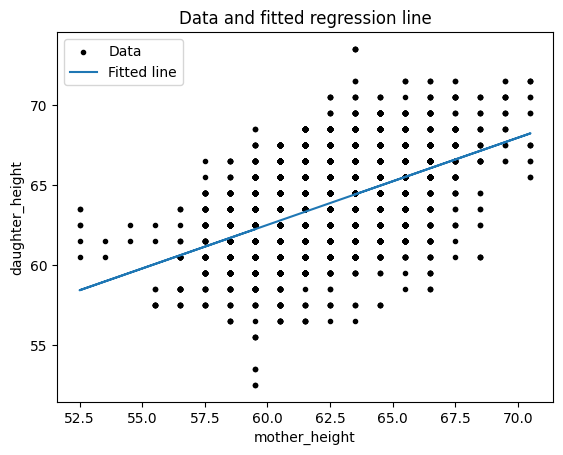

In [34]:
predictor = "mother_height"
outcome = "daughter_height"
data = heights.copy()
results_ = results_heights.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

fitted_values = a_hat + b_hat * data[predictor]

# Plot the fitted line
plt.plot(data[predictor], fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### Coefficient Interpretation





In [35]:
results_heights

,coef,std err
Intercept,29.798406,0.790337
mother_height,0.544937,0.012636


- the average daughter height when height of a mom 0 inch is 30 inch
- the average difference in height between two daughter with one inch different in mom's height, is 0.54 inch
- We could write the equation in more convenience way to interpret the model

In [36]:
mean_mother_height = np.round(np.mean(heights["mother_height"]),1)
mean_daughter_height = np.round(np.mean(heights["daughter_height"]),1)


print(f"Average of mother's height    : {mean_mother_height}")
print(f"Average of daughters's height : {mean_daughter_height}")

Average of mother's height    : 62.5
Average of daughters's height : 63.9


$$ y = 63.9 + 0.54(x − 62.5) $$
- If a mother has average height (62.5 inch), her adult daughter is predicted to have average height (63.9 inch).

- And then for each inch that a mother is taller (or shorter) than the average height, her daughter is expected to be about 0.54 inch taller (or shorter) than the average for her generation.

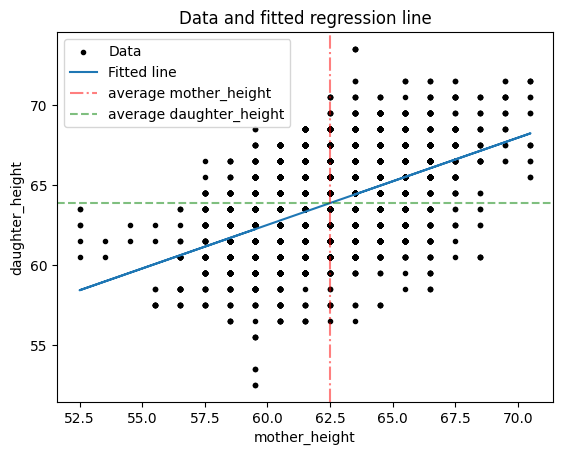

In [37]:
predictor = "mother_height"
outcome = "daughter_height"
data = heights.copy()
results_ = results_heights.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

fitted_values = a_hat + b_hat * data[predictor]

# Plot the fitted line
plt.plot(data[predictor], fitted_values, label="Fitted line")
plt.axvline(data[predictor].mean(), linestyle = "-.", alpha = 0.5, label = f"average {predictor}", c = "r")
plt.axhline(data[outcome].mean(), linestyle = "--", alpha = 0.5, label = f"average {outcome}", c = "g")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### The paradox of regression to the mean

- The apparent paradox in the regression slope of 0.54 in Figure is that it appears to predict that daughters will be more average than their mothers and that individuals will get more average with each generation. However, as we can see from the height of women, this is not the case. Women's heights are still as varied as they were after Pearson and Lee
- The resolution to this paradox is that a woman's expected height is closer to the average than her mother's height, yet her actual height is not the same as the prediction, indicating *error*.

- The point predictions regress towards the mean (coefficient smaller than 1), reducing variation. However, the model error, or prediction flaw, adds variance, just enough to maintain the overall variation in height relatively constant from generation to generation.

- As a result, if predictions are poor in a stable environment, regression to the mean will always occur in some form. The imperfection of the prediction stimulates variation, and regression in the point prediction is necessary to keep the overall variance constant.